In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%load_ext tensorboard
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)
import datetime, os

2.4.1


1.1 import dataset

In [4]:

# dataset = pd.read_csv('/content/drive/MyDrive/Courses/1. Chem 545 546/Project/volkswagen_e_golf.csv',encoding='latin-1')
dataset = pd.read_csv('volkswagen_e_golf.csv',encoding='latin-1')

df = pd.DataFrame(dataset)

dataset.head()


,manufacturer,model,version,power(kW),fuel_date,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
0,Volkswagen,Golf,e-Golf,85,08.02.2019,80,NaN,Electricity,Winter tires,0,0,1,Normal,17.8,0,1,53.0,1.0
1,Volkswagen,Golf,e-Golf,85,06.02.2019,50,12.29,Electricity,Winter tires,0,0,1,Normal,15.5,0,1,47.0,-1.3
2,Volkswagen,Golf,e-Golf,85,05.02.2019,43,8.68,Electricity,Winter tires,0,1,1,Normal,18.0,0,1,58.0,1.2
3,Volkswagen,Golf,e-Golf,85,04.02.2019,44,1.50,Electricity,Winter tires,0,1,1,Normal,16.1,0,1,43.0,-0.7
4,Volkswagen,Golf,e-Golf,85,04.02.2019,76,14.44,Electricity,Winter tires,0,1,0,Normal,19.0,0,1,76.0,2.2


In [5]:
dataset.columns

Index(['manufacturer', 'model', 'version', 'power(kW)', 'fuel_date',
       'trip_distance(km)', 'quantity(kWh)', 'fuel_type', 'tire_type', 'city',
       'motor_way', 'country_roads', 'driving_style', 'consumption(kWh/100km)',
       'A/C', 'park_heating', 'avg_speed(km/h)', 'ecr_deviation'],
      dtype='object')

In [6]:
dataset.isna().sum()

manufacturer               0
model                      0
version                    0
power(kW)                  0
fuel_date                  0
trip_distance(km)          1
quantity(kWh)              1
fuel_type                  0
tire_type                  0
city                       0
motor_way                  0
country_roads              0
driving_style              0
consumption(kWh/100km)     0
A/C                        0
park_heating               0
avg_speed(km/h)           13
ecr_deviation              0
dtype: int64

In [7]:
# clean the data
dataset = dataset.dropna()
dataset.isna().sum()

manufacturer              0
model                     0
version                   0
power(kW)                 0
fuel_date                 0
trip_distance(km)         0
quantity(kWh)             0
fuel_type                 0
tire_type                 0
city                      0
motor_way                 0
country_roads             0
driving_style             0
consumption(kWh/100km)    0
A/C                       0
park_heating              0
avg_speed(km/h)           0
ecr_deviation             0
dtype: int64

### Split the data into train and test

Now split the dataset into a training set and a test set.

Use the test set in the final evaluation of our models.

In [8]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
features_select=['avg_speed(km/h)','motor_way', 'country_roads']
# features_select=['avg_speed(km/h)','motor_way']

# features_select=['trip_distance(km)','avg_speed(km/h)']

train_features = train_dataset[features_select]
test_features = test_dataset[features_select]

# train_labels = train_dataset[['quantity(kWh)']]
# test_labels = test_dataset[['quantity(kWh)']]

train_labels = train_dataset[['consumption(kWh/100km)']]
test_labels = test_dataset[['consumption(kWh/100km)']]

In [9]:
train_features

,avg_speed(km/h),motor_way,country_roads
3132,48.0,1,1
2894,29.0,0,1
883,75.0,1,0
2359,63.0,1,0
2243,19.0,0,0
...,...,...,...
2776,23.0,0,0
1191,47.0,1,1
338,77.0,1,0
47,68.0,0,1


## A DNN regression

In [25]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir logs (started 0:03:12 ago; pid 259)


In [20]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='tanh'),
      layers.Dense(64, activation='tanh'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                metrics=['accuracy'],
                optimizer=tf.keras.optimizers.Adam(0.005))

  return model

In [37]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))


In [39]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 3)                 7         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 4,488
Trainable params: 4,481
Non-trainable params: 7
_________________________________________________________________


This is the key component in fitting the features to the labels

In [40]:
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100, 
    callbacks=[tensorboard_callback])

In [41]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

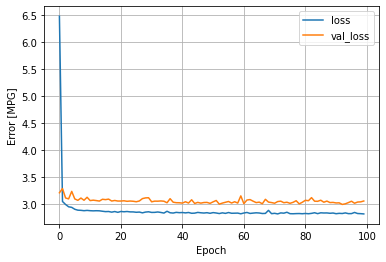

In [46]:
plot_loss(history)

use tensorboard to visualize

In [ ]:
%tensorboard --logdir logs